# e.5-11

In [1]:
import pandas as pd
import numpy as np
import missingno
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [5]:
# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


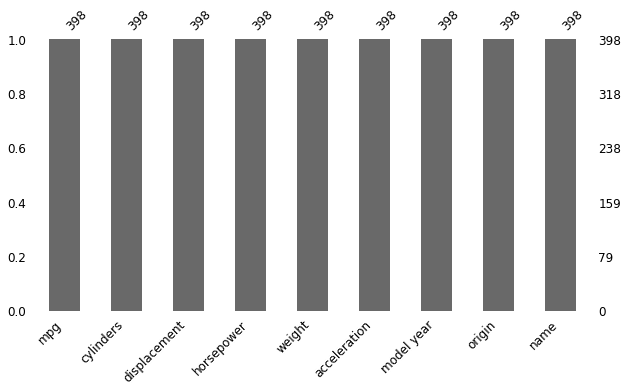

In [6]:
missingno.bar(df, figsize=(10,5), fontsize=12);

In [7]:
# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경

In [8]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제

In [9]:
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [12]:
# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

In [13]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

In [14]:
# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

In [16]:
# hp_bin 열의 범주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))
# 딥러닝

    저출력  보통출력  고출력
0     0     1    0
1     0     1    0
2     0     1    0
3     0     1    0
4     0     1    0
5     0     0    1
6     0     0    1
7     0     0    1
8     0     0    1
9     0     0    1
10    0     0    1
11    0     1    0
12    0     1    0
13    0     0    1
14    1     0    0


# e.5-12

전처리. 머신러닝

In [17]:
# sklern 라이브러리 불러오기
from sklearn import preprocessing    

In [18]:
# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder()       # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

In [20]:
df['hp_bin'].head(15)

0     보통출력
1     보통출력
2     보통출력
3     보통출력
4     보통출력
5      고출력
6      고출력
7      고출력
8      고출력
9      고출력
10     고출력
11    보통출력
12    보통출력
13     고출력
14     저출력
Name: hp_bin, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [21]:
# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))  
print(onehot_labeled)
print(type(onehot_labeled))

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]
<class 'numpy.ndarray'>


In [22]:
# 2차원 행렬로 형태 변경
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled), 1) 
print(onehot_reshaped)
print(type(onehot_reshaped))

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]
<class 'numpy.ndarray'>


In [23]:
# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)
print(type(onehot_fitted))

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
<class 'scipy.sparse.csr.csr_matrix'>


# 5-13

In [24]:
# horsepower 열의 통계 요약정보로 최대값(max)을 확인
print(df.horsepower.describe())
print('\n')

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64




In [25]:
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.horsepower = df.horsepower / abs(df.horsepower.max()) 

print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64


count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


# e.5-14

In [26]:
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
min_x = df.horsepower - df.horsepower.min()
min_max = df.horsepower.max() - df.horsepower.min()
df.horsepower = min_x / min_max

print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64


count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64


# e.5-15

In [30]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 CSV 파일을 가져와서 df로 변환
df = pd.read_csv('./data/stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [31]:
# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None


In [32]:
# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
df['new_Date'].head()

0   2018-07-02
1   2018-06-29
2   2018-06-28
3   2018-06-27
4   2018-06-26
Name: new_Date, dtype: datetime64[ns]

In [34]:
# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())
print('\n')

# 뉴데이터 조작하려고 복사한 것

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None




In [35]:
print(type(df['new_Date'][0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [36]:
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19


In [37]:
# 시계열 값으로 변환된 열을 새로운 행 인덱스로 지정. 기존 날짜 열은 삭제
df.set_index('new_Date', inplace=True)
df

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039
2018-06-25,2018-06-25,11150,11400,11450,11000,55519
2018-06-22,2018-06-22,11300,11250,11450,10750,134805
2018-06-21,2018-06-21,11200,11350,11750,11200,133002
2018-06-20,2018-06-20,11550,11200,11600,10900,308596


In [38]:
df.drop('Date', axis=1, inplace=True)
df

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


In [39]:
# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())

            Close  Start   High    Low  Volume
new_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes
None


# e.5-16

In [40]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
ts_dates = pd.to_datetime(dates)   
print(ts_dates)
print('\n')

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)




In [41]:
# Timestamp를 Period로 변환
pr_day = ts_dates.to_period(freq='D')
print(pr_day)

PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]', freq='D')


In [42]:
pr_month = ts_dates.to_period(freq='M')
print(pr_month)
pr_year = ts_dates.to_period(freq='A')
print(pr_year)

PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]', freq='M')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')


# e.5-17

In [45]:
# Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준
ts_ms = pd.date_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=6,                # 생성할 Timestamp의 개수
                   freq='MS',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')          # 시간대(timezone)
print(ts_ms)
print('\n')

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')




In [46]:
# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2019-01-01', periods=6, 
                   freq='M',              # 시간 간격 (M: 월의 마지막 날)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_me)
print('\n')

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')




In [47]:
# 분기(3개월) 간격, 월의 마지막 날 기준
ts_3m = pd.date_range('2019-01-01', periods=6, 
                   freq='3M',             # 시간 간격 (3M: 3개월)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_3m)

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


# e.5-18

In [48]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# Period 배열 만들기 - 1개월 길이
pr_m = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='M')                   # 기간의 길이 (M: 월)
print(pr_m)
print('\n')

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]', freq='M')




In [49]:
# Period 배열 만들기 - 1시간 길이
pr_h = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='H')                   # 기간의 길이 (H: 시간)
print(pr_h)
print('\n')

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]', freq='H')




In [50]:
# Period 배열 만들기 - 2시간 길이
pr_2h = pd.period_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='2H')                  # 기간의 길이 (H: 시간)
print(pr_2h)

PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]', freq='2H')


# e.5-19

컨트롤하고 슬러시/하면 전체 주석처리

In [53]:
# # -*- coding: utf-8 -*-

# # 라이브러리 불러오기
# import pandas as pd

# # read_csv() 함수로 파일 읽어와서 df로 변환
# df = pd.read_csv('stock-data.csv')

# # 문자열인 날짜 데이터를 판다스 Timestamp로 변환
# df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
# print(df.head())
# print('\n')

In [58]:
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19


In [59]:
# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('./data/stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
print(df.head())

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26


In [63]:
# dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
print(df.head())
print('\n') # 분절

         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  Day
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7    2
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   26




In [64]:
# Timestamp를 Period로 변환하여 년월일 표기 변경하기
df['Date_yr'] = df['new_Date'].dt.to_period(freq='A')
df['Date_m'] = df['new_Date'].dt.to_period(freq='M')
print(df.head())
print('\n')

         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  \
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7   
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   

   Day Date_yr   Date_m  
0    2    2018  2018-07  
1   29    2018  2018-06  
2   28    2018  2018-06  
3   27    2018  2018-06  
4   26    2018  2018-06  




In [65]:
# 원하는 열을 새로운 행 인덱스로 지정
df.set_index('Date_m', inplace=True)
print(df.head())

               Date  Close  Start   High    Low  Volume   new_Date  Year  \
Date_m                                                                     
2018-07  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018   
2018-06  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018   
2018-06  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018   
2018-06  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018   
2018-06  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018   

         Month  Day Date_yr  
Date_m                       
2018-07      7    2    2018  
2018-06      6   29    2018  
2018-06      6   28    2018  
2018-06      6   27    2018  
2018-06      6   26    2018  


# e.5-20

In [66]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('./data/stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   # 새로운 열에 추가
df.set_index('new_Date', inplace=True)        # 행 인덱스로 지정

print(df.head())
print('\n')
print(df.index)
print('\n')

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039


DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)




In [68]:
# 날짜 인덱스를 이용하여 데이터 선택하기
df_y = df['Date']
print(df_y.head())
print('\n')

new_Date
2018-07-02    2018-07-02
2018-06-29    2018-06-29
2018-06-28    2018-06-28
2018-06-27    2018-06-27
2018-06-26    2018-06-26
Name: Date, dtype: object




In [69]:
df_ym = df.loc['2018-07']    # loc 인덱서 활용
print(df_ym)
print('\n')

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977




In [70]:
df_ym_cols = df.loc['2018-07', 'Start':'High']    # 열 범위 슬라이싱
print(df_ym_cols)
print('\n')

            Start   High
new_Date                
2018-07-02  10850  10900




In [71]:
df_ymd = df['2018-07-02']
print(df_ymd)
print('\n')

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977




C:\ProgramData\Anaconda3\envs\py3_7_6\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


In [72]:
df_ymd_range = df['2018-06-25':'2018-06-20']    # 날짜 범위 지정
print(df_ymd_range)
print('\n')

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-06-25  2018-06-25  11150  11400  11450  11000   55519
2018-06-22  2018-06-22  11300  11250  11450  10750  134805
2018-06-21  2018-06-21  11200  11350  11750  11200  133002
2018-06-20  2018-06-20  11550  11200  11600  10900  308596




In [74]:
# 시간 간격 계산. 최근 180일 ~ 189일 사이의 값들만 선택하기
today = pd.to_datetime('2018-12-25')            # 기준일 생성
df['time_delta'] = today - df.index             # 날짜 차이 계산
df['time_delta']

time_delta
176 days   2018-07-02
179 days   2018-06-29
180 days   2018-06-28
181 days   2018-06-27
182 days   2018-06-26
183 days   2018-06-25
186 days   2018-06-22
187 days   2018-06-21
188 days   2018-06-20
189 days   2018-06-19
190 days   2018-06-18
193 days   2018-06-15
194 days   2018-06-14
196 days   2018-06-12
197 days   2018-06-11
200 days   2018-06-08
201 days   2018-06-07
203 days   2018-06-05
204 days   2018-06-04
207 days   2018-06-01
Name: time_delta, dtype: datetime64[ns]

In [75]:
df.set_index('time_delta', inplace=True)        # 행 인덱스로 지정
df_180 = df['180 days':'189 days']
print(df_180)

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [180 days] of type str